<a href="https://colab.research.google.com/github/tnnkhang2211/AI/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, normalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [32]:
folder='/content/drive/MyDrive/face/face/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Dat'):
    output = 1.0
  if file.startswith('Nha'):
    output = 2.0
  if file.startswith('Nhut'):
    output = 3.0
  if file.startswith('phat'):
    output = 4.0 
  if file.startswith('Tan'):
    output = 5.0
  if file.startswith('Thanh'):
    output = 6.0
  if file.startswith('Tuan'):
    output = 7.0    
  photo = load_img(folder+file, target_size = (60,60))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape) 

(411, 60, 60, 3) (411,)


In [33]:
# Save data 
save('/content/drive/MyDrive/face/face_photos.npy', photos)
save('/content/drive/MyDrive/face/face_labels.npy', labels)

In [34]:
photos = np.load('/content/drive/MyDrive/face/face_photos.npy')
labels = np.load('/content/drive/MyDrive/face/face_labels.npy')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, random_state=3)

In [36]:
X_train.shape

(369, 60, 60, 3)

In [37]:
y_train.shape

(369,)

In [38]:
X_test.shape

(42, 60, 60, 3)

In [39]:
y_test.shape

(42,)

In [40]:
X_train = X_train.astype('float32')/255
y_train = to_categorical(y_train, 8) 

X_test = X_test.astype('float32')/255
y_test = to_categorical(y_test, 8)

In [41]:
y_train.shape

(369, 8)

In [42]:
y_test.shape

(42, 8)

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(60, 60, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(8, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

In [45]:
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(X_train, y_train, batch_size = 100, epochs = 45, verbose = 1)

Epoch 1/45
4/4 [==============================] - 1s 131ms/step - loss: 2.0320 - accuracy: 0.1789
Epoch 2/45
4/4 [==============================] - 0s 14ms/step - loss: 1.6816 - accuracy: 0.6206
Epoch 3/45
4/4 [==============================] - 0s 14ms/step - loss: 1.0765 - accuracy: 0.8211
Epoch 4/45
4/4 [==============================] - 0s 16ms/step - loss: 0.4139 - accuracy: 0.9458
Epoch 5/45
4/4 [==============================] - 0s 15ms/step - loss: 0.1192 - accuracy: 0.9837
Epoch 6/45
4/4 [==============================] - 0s 16ms/step - loss: 0.0578 - accuracy: 0.9892
Epoch 7/45
4/4 [==============================] - 0s 16ms/step - loss: 0.0171 - accuracy: 0.9973
Epoch 8/45
4/4 [==============================] - 0s 13ms/step - loss: 0.0095 - accuracy: 0.9973
Epoch 9/45
4/4 [==============================] - 0s 14ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 10/45
4/4 [==============================] - 0s 14ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 11/45
4/4 [===========

Test loss:  0.006614639423787594
Test accuracy 1.0


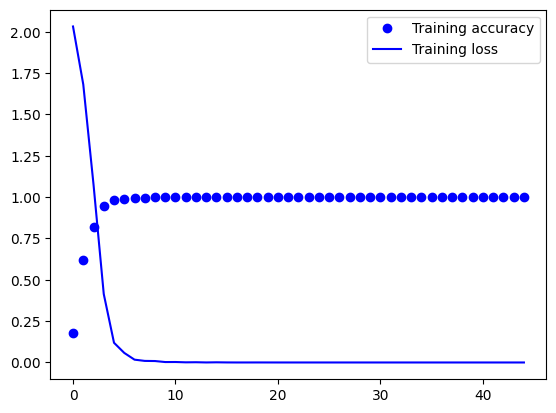

In [46]:
test = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

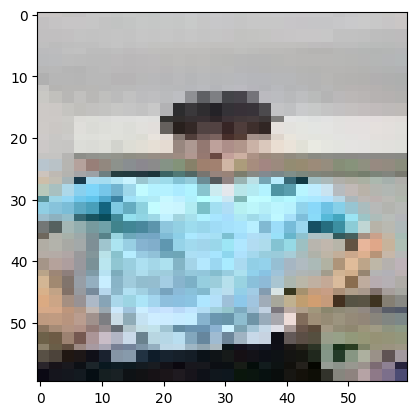

[0. 1. 0. 0. 0. 0. 0. 0.]


In [47]:
img = X_test[12]
plt.imshow(img)
plt.show()
print(y_test[12])

In [50]:
X_pred = X_test[12].reshape(1,60,60,3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 62ms/step


array([3])

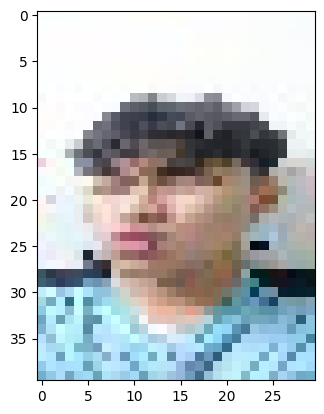

In [51]:
url = '/content/drive/MyDrive/face/face/Dat (24).jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

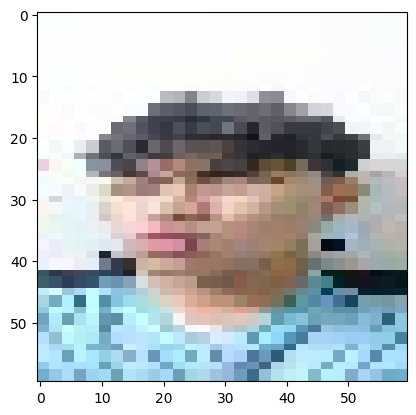

In [52]:
img = load_img(url, target_size = (60,60,3))
plt.imshow(img)

In [53]:
img = img_to_array(img)
img = img.reshape(1,60,60,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 28ms/step


array([1])

In [54]:
model.save('/content/drive/MyDrive/face/model_face_save.h5')